In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
## merging 12 months of sales data into a single file

#df  = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
#df.head()

joined_files = os.path.join("./Sales_Data", "*.csv")

joined_list = glob.glob(joined_files)

all_months_df = pd.concat(map(pd.read_csv, joined_list), ignore_index = True)

## Droping NA columns
all_months_df = all_months_df.dropna(how='all').reset_index(drop=True)





### Q1: What was the best month for sales? How much was earned that month?

In [3]:
## Add Month, Total order value column
## Cleaning Data with invalid rows

all_months_df = all_months_df[all_months_df['Order Date'] != 'Order Date']
all_months_df['Quantity Ordered'] = pd.to_numeric(all_months_df['Quantity Ordered'])
all_months_df['Price Each'] = pd.to_numeric(all_months_df['Price Each'])

all_months_df['Month'] = pd.DatetimeIndex(all_months_df['Order Date']).month
all_months_df['Sales'] = all_months_df['Quantity Ordered'] * all_months_df['Price Each']

In [4]:
## Finally answering the question

final_df = all_months_df.groupby(['Month']).sum()

C:\Users\tejas\AppData\Local\Temp\ipykernel_14732\3200894425.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = all_months_df.groupby(['Month']).sum()


       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


Text(0.5, 0, 'Month Number')

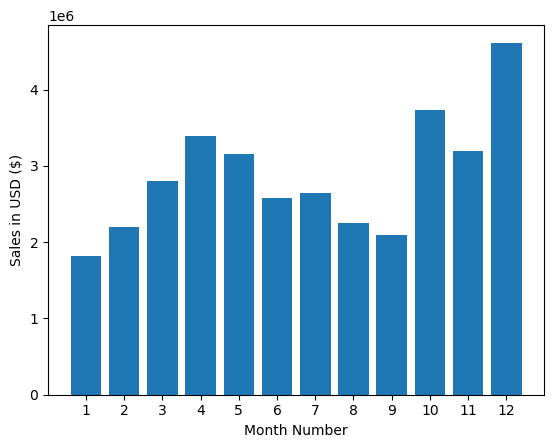

In [5]:
## Plot it

print(final_df)
months = final_df.index

plt.bar(months, final_df['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')

### Q2: What city had the highest number of sales

In [6]:
## Add City column

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_months_df['City'] = all_months_df['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

## Answer

final_df = all_months_df.groupby('City').sum()


C:\Users\tejas\AppData\Local\Temp\ipykernel_14732\1747986195.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = all_months_df.groupby('City').sum()


Text(0.5, 0, 'City Name')

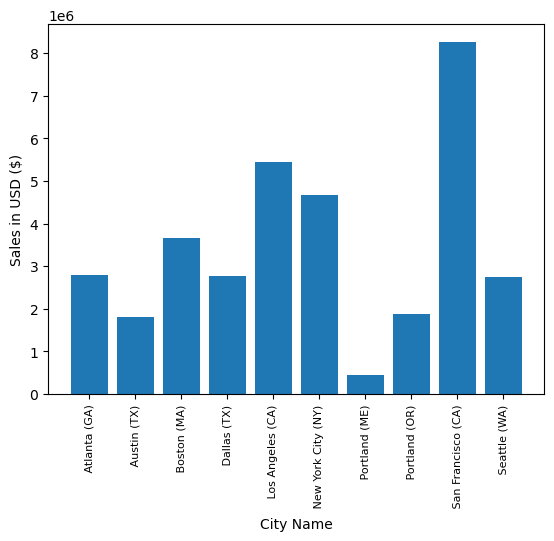

In [7]:
## Plot it

city = final_df.index

plt.bar(city, final_df['Sales'])
plt.xticks(city, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')

### Q3: What time should we display the advertisements to maximize the likelihood of customer's buying product?

In [8]:
## Get the Hour, Minute from Order Date column

all_months_df['Order Date'] = pd.to_datetime(all_months_df['Order Date'])
all_months_df['Hour'] = all_months_df['Order Date'].dt.hour
all_months_df['Minute'] = all_months_df['Order Date'].dt.minute

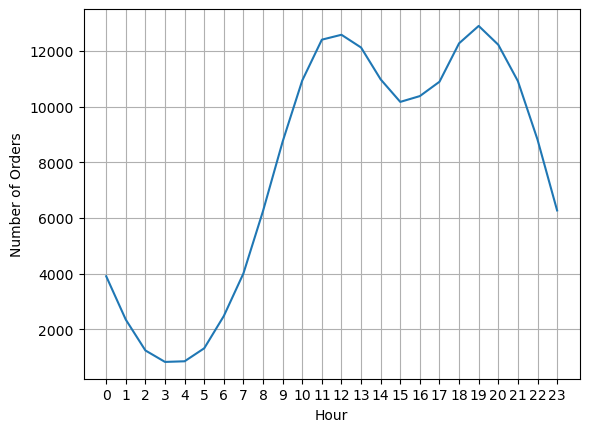

In [9]:
## Plot it
final_df = all_months_df.groupby('Hour').count()

hours = final_df.index
plt.plot(hours, final_df['Order ID'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

### Q4: What products are most often sold together

In [28]:
all_months_df.to_csv('./all_months_data.csv')

In [31]:
double_orders_df = all_months_df.groupby(['Order ID']).filter(lambda x : len(x) > 1)
double_orders_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186248,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
186259,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
186260,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
186296,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


In [156]:
double_orders_df['Grouped'] = double_orders_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = double_orders_df[['Order ID','Grouped']].drop_duplicates()


Text(0.5, 0, 'Product Groups')

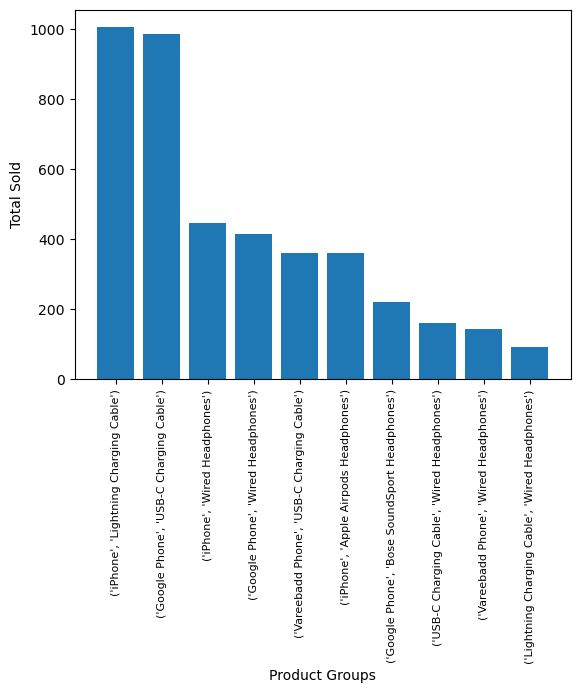

In [151]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
products = []
values = []

for key, value in count.most_common(10):
    products.append(key)
    values.append(value)
    

# Plot it
products = [str(item) for item in products]

plt.bar(products, values)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Total Sold')
plt.xlabel('Product Groups')